In [22]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [23]:
np.random.seed(0)
x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0]>0,x_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

In [24]:
#np.where?

In [25]:
#print(x_xor)

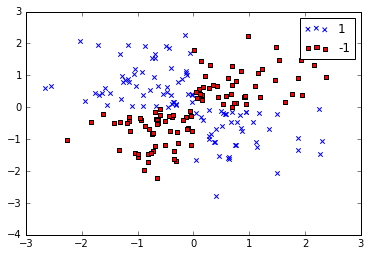

In [26]:
plt.scatter(x_xor[y_xor==1,0],x_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(x_xor[y_xor==-1,0],x_xor[y_xor==-1,1],c='r',marker='s',label='-1')
#plt.ylim(-3.0)
plt.legend()
plt.show()

In [27]:
# below is an exmaple of SVM with linear kernel

In [28]:
svmLinear = SVC(kernel='linear',random_state=0,gamma=0.1,C=10.0)

In [29]:
svmLinear.fit(x_xor,y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
def plot_decision_region(X,y,classifier,test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors  = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot all samples
    X_test,y_test = X[test_idx,:], y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                    alpha=0.8,cmap=cmap(idx),
                    marker=markers[idx],label=cl)  

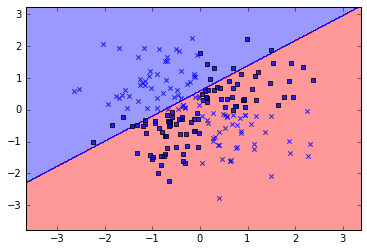

In [38]:
plot_decision_region(x_xor,y_xor,classifier = svmLinear)

In [39]:
# below is an example of SVM with linear kernel
svmRadial = SVC(kernel='rbf',random_state=0,gamma=0.1,C=10.0)
svmRadial.fit(x_xor,y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

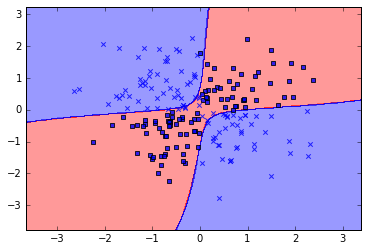

In [40]:
plot_decision_region(x_xor,y_xor,classifier = svmRadial)

In [41]:
svmRadial.score(x_xor,y_xor)

0.94999999999999996

In [59]:
from sklearn.grid_search import GridSearchCV
# define the parameters values that should be searched
C_range = np.arange(1,10,.5)
g_range = np.arange(0,2,.1)
deg = range(1,10)

In [58]:
#C_range
#g_range
#deg

[1, 2, 3, 4]

In [65]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range)
print param_grid

{'C': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])}


In [68]:
svmTest = SVC()
# instantiate and fit the grid
grid = GridSearchCV(svmTest, param_grid, cv=10, scoring='accuracy')
grid.fit(x_xor, y_xor)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [69]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
# examine the best model
print grid.best_score_
print grid.best_params_

0.98
{'C': 6.0}


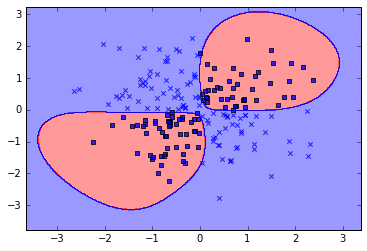

In [72]:
svmBest = SVC(C=6.0)
svmBest.fit(x_xor,y_xor)
plot_decision_region(x_xor,y_xor,classifier = svmBest)

In [74]:
resVal=[]
for C in C_range :
    svmTest = SVC(C=C)
    svmTest.fit(x_xor,y_xor)
    res = svmTest.score(x_xor,y_xor)
    print C,res
    resVal.append(res)

1.0 0.985
1.5 0.985
2.0 0.975
2.5 0.975
3.0 0.965
3.5 0.97
4.0 0.97
4.5 0.975
5.0 0.98
5.5 0.98
6.0 0.985
6.5 0.98
7.0 0.98
7.5 0.98
8.0 0.98
8.5 0.98
9.0 0.98
9.5 0.975


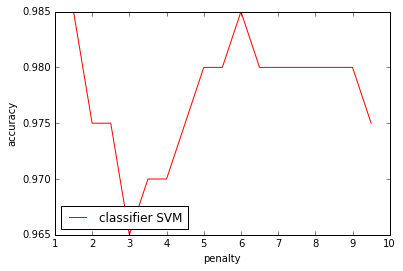

In [76]:
plt.plot(C_range, resVal,c='r')
plt.xlabel('penalty')
plt.ylabel('accuracy')
plt.legend(['classifier SVM'], loc='lower left')

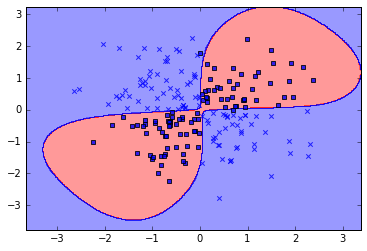

In [77]:
svmBest2 = SVC(C=1.0)
svmBest2.fit(x_xor,y_xor)
plot_decision_region(x_xor,y_xor,classifier = svmBest2)

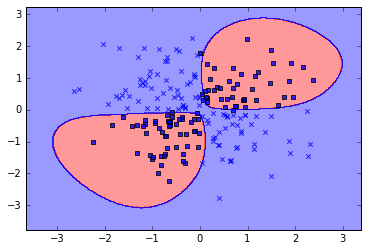

In [78]:
svmBad = SVC(C=3.0)
svmBad.fit(x_xor,y_xor)
plot_decision_region(x_xor,y_xor,classifier = svmBad)